Лабораторная работа номер 8

Упражнение 1

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [3]:
def calculate_derivative(func, x, delta_x=1e-5):
    derivative = (func(x + delta_x) - func(x)) / delta_x
    return derivative

In [12]:
def func1(x):
    return x**(1/3)

def func2(x):
    return 2**x

points = [1, 2, -3]
for x in points:
    print('Производные функций в точке ', x)
    print('f = x^(1/3) : ', calculate_derivative(func1, x))
    print('f = 2^x : ', calculate_derivative(func2, x))
    print()

Производные функций в точке  1
f = x^(1/3) :  0.333332222224314
f = 2^x :  1.3862991656843346

Производные функций в точке  2
f = x^(1/3) :  0.20998649166159564
f = 2^x :  2.7725983313686693

Производные функций в точке  -3
f = x^(1/3) :  (-0.08012506514942785-0.13878068381156794j)
f = 2^x :  0.08664369785527092



Проверка

In [14]:
x= sp.symbols('x')
f=x**(1/3)
y= sp.diff(f,x,1)
print(y.subs(x, 1))
print(y.subs(x, 2))
print(y.subs(x, -3))

0.333333333333333
0.209986841649146
-0.0801249761281894 - 0.138780529609267*I


Упражнение 2

In [16]:
f = (sp.atan(sp.sqrt(x)))**2
y= sp.diff(f,x,1)
print(y.subs(x, 0.5))

0.580279834244736


In [17]:
f = 3**(sp.asin(x**2))
y= sp.diff(f,x,1)
print(y.subs(x, 0.5))

1.36324364610782*log(3)


Упражнение 3

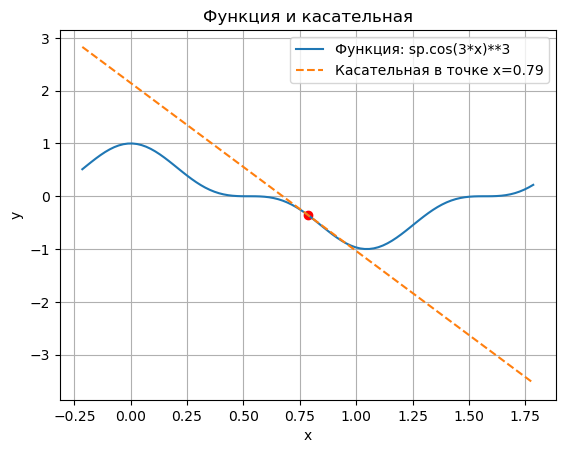

In [21]:
def build_tangent_line(function_str, x0):
    x = sp.symbols('x')
    function = eval(function_str)
    derivative = sp.diff(function, x)

    x_values = np.linspace(x0 - 1, x0 + 1, 100)

    y_function = np.vectorize(lambda x_val: function.subs(x, x_val))(x_values)
    y_tangent = np.vectorize(lambda x_val: derivative.subs(x, x0) * (x_val - x0) + function.subs(x, x0))(x_values)

    plt.plot(x_values, y_function, label=f'Функция: {function_str}')
    plt.plot(x_values, y_tangent, label='Касательная в точке x={:.2f}'.format(x0), linestyle='--')

    plt.scatter([x0], [function.subs(x, x0)], color='red')
    
    plt.title('Функция и касательная')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

build_tangent_line('sp.cos(3*x)**3', np.pi/4)

Упражнение 4

Матрица отношений ∆s(t_0,∆t)/∆t:
[[0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
  0.1  ]
 [2.156 2.085 2.026 1.976 1.933 1.895 1.86  1.831 1.803 1.779 1.756 1.735
  1.716]]


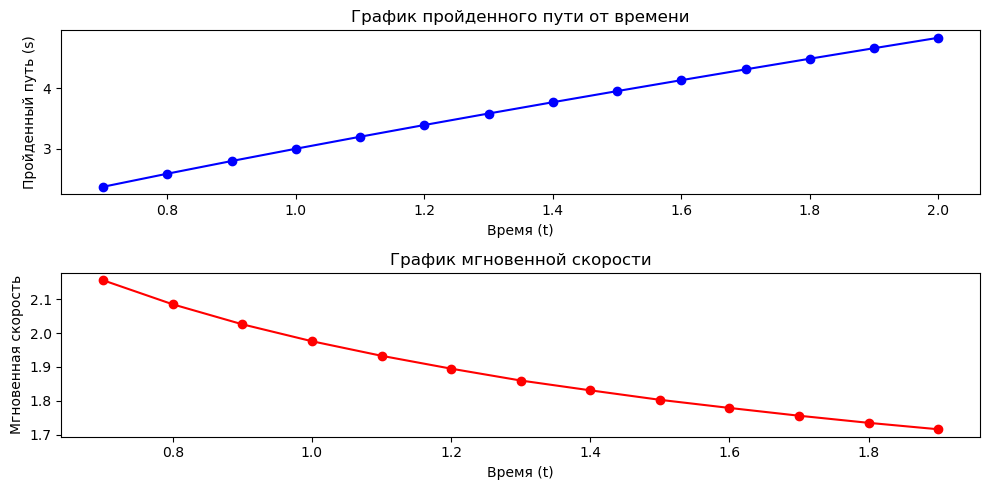

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
t0_values = np.array([0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])
s_values = np.array([2.3733, 2.5889, 2.7974, 3.0000, 3.1976, 3.3909, 3.5804, 3.7664, 3.9495, 4.1298, 4.3077, 4.4833, 4.6568, 4.8284])

# средние скорости
delta_t_values = np.diff(t0_values)
delta_s_values = np.diff(s_values)
average_speeds = delta_s_values / delta_t_values

# матрица
matrix = np.vstack((delta_t_values, average_speeds))
print("Матрица отношений ∆s(t_0,∆t)/∆t:")
print(matrix)


plt.figure(figsize=(10, 5))

# График пройденного пути от времени
plt.subplot(2, 1, 1)
plt.plot(t0_values, s_values, marker='o', linestyle='-', color='b')
plt.title('График пройденного пути от времени')
plt.xlabel('Время (t)')
plt.ylabel('Пройденный путь (s)')

# График мгновенной скорости
plt.subplot(2, 1, 2)
plt.plot(t0_values[:-1], average_speeds, marker='o', linestyle='-', color='r')
plt.title('График мгновенной скорости')
plt.xlabel('Время (t)')
plt.ylabel('Мгновенная скорость')

plt.tight_layout()
plt.show()